In [6]:
import numpy as np

In [9]:
class LogisticReg:

    def fit(self, X, y, eta=0.1, iteration=1000):
        g, w = [], []
        self.weights = np.zeros(shape=X.shape[1])
        for t in range(iteration):
            n = np.random.randint(0,len(X))
            gradient = int(-y[n])*np.dot(2, X[n])*np.exp(int(-y[n])*2*np.dot(self.weights,X[n])) /(1+np.exp(int(-y[n])*2*np.dot(self.weights,X[n]))) 
            self.weights = self.weights - eta*gradient
            g.append(self.sigmoid(self.weights, X[n]))
            w.append(self.weights)
        return w, g

    def sigmoid(self, x, w):
        return np.sign(np.dot(w,x))

    def error(self, w, X, y):
        error = []
        for i in range(len(w)):
            summa=0
            for j in range(len(y)):
                summa += np.log(1 + np.exp(-2*y[j]*np.dot(w[i], X[j])))
            error.append(summa/len(y))
        return error


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [4]:
y_train

array([2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2,
       2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2,
       1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0,
       2, 1, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1,
       1, 2, 0, 0, 1, 1, 2, 1, 2, 0])

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

log = LogisticRegression(multi_class='ovr', solver='lbfgs')
log.fit(X_train, y_train)
log.predict(X_test)

array([0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0,
       2, 0, 1, 2, 2, 1, 1, 0])

## Predicted values for y_train

In [28]:
y_labels = [0,1,2]
predicted = np.ones(len(y_train))
error = []
for i in y_labels:
    y_train_new = []
    for j in range(len(y_train)):
        if y_train[j]!=i:
            y_bin=-1
        else:
            y_bin=1
        y_train_new.append(y_bin)
    logistic = LogisticReg()
    weights, g = logistic.fit(X_train, np.array(y_train_new), eta=0.001, iteration=2000)
    for k in range(len(X_train)):
        if logistic.sigmoid(X_train[k], weights[len(weights)-1])==1:
            y_class = i
            np.put(predicted, k, y_class)
    error.append(logistic.error(weights, X_train, y_train_new))
print(predicted)


[2. 0. 0. 0. 2. 2. 2. 2. 1. 2. 0. 2. 0. 2. 0. 1. 1. 2. 2. 2. 1. 2. 2. 0.
 2. 1. 0. 0. 1. 1. 0. 0. 2. 2. 0. 2. 1. 0. 1. 2. 2. 2. 2. 2. 1. 0. 1. 2.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 2. 2. 2. 1. 0. 1. 0. 0. 0. 2. 1. 2. 0. 1. 2.
 0. 2. 1. 2. 1. 1. 0. 1. 2. 2. 2. 0. 2. 0. 0. 2. 2. 0. 1. 0. 2. 0. 2. 1.
 1. 1. 2. 2. 2. 2. 2. 0. 1. 0. 0. 0. 0. 1. 1. 2. 0. 0. 1. 1. 2. 2. 2. 0.]


## Accuracy score of prediction of y_train

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, predicted)

0.975

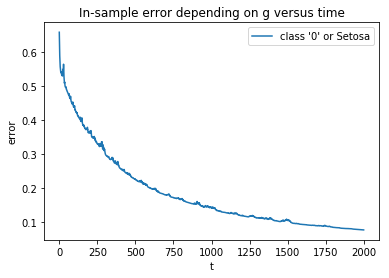

In [42]:
import matplotlib.pyplot as plt

plt.plot(np.arange(2000), error[0], label="class '0' or Setosa")
# plt.plot(np.arange(2000), error[1], label="class '1'")
# plt.plot(np.arange(2000), error[2], label="class '2'")
plt.title('In-sample error depending on g versus time')
plt.xlabel('t')
plt.ylabel('error')
plt.legend()
plt.show()

## Predicted values for y_test

In [33]:
y_test

array([1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 0, 2, 2])

In [36]:
y_labels = [0,1,2]
predicted = np.ones(len(y_test))
error = []
for i in y_labels:
    y_train_new = []
    y_test_new=[]
    for j in range(len(y_train)):
        if y_train[j]!=i:
            y_bin=-1
        else:
            y_bin=1
        y_train_new.append(y_bin)
    for j in range(len(y_test)):
        if y_test[j]!=i:
            y_bin=-1
        else:
            y_bin=1
        y_test_new.append(y_bin)
    logistic = LogisticReg()
    weights, g = logistic.fit(X_train, np.array(y_train_new), eta=0.001, iteration=2000)
    for k in range(len(X_test)):
        if logistic.sigmoid(X_test[k], weights[len(weights)-1])==1:
            y_class = i
            np.put(predicted, k, y_class)
    error.append(logistic.error(weights, X_test, y_test_new))
print(predicted)
        
            



[1. 1. 1. 0. 0. 1. 1. 2. 1. 1. 2. 0. 0. 1. 0. 0. 0. 1. 2. 1. 0. 2. 1. 1.
 1. 1. 1. 0. 2. 2.]


## Accuracy of my prediction

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.9666666666666667

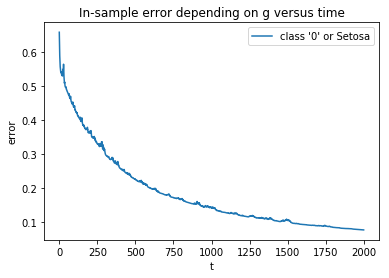

In [41]:
import matplotlib.pyplot as plt

plt.plot(np.arange(2000), error[0], label="class '0' or Setosa")
# plt.plot(np.arange(2000), error[1], label="class '1'")
# plt.plot(np.arange(2000), error[2], label="class '2'")
plt.title('In-sample error depending on g versus time')
plt.xlabel('t')
plt.ylabel('error')
plt.legend()
plt.show()

## Discussion

According to accuracy scores in both train and test cases logistic regression performs very well. Moreover, error functions also indicate that error decreases as $t$ increases, meaning that our weights are updated with nice errors. However, weights that give small $error\leq0.2$ are found at time $t=625$, which means slow convergence. 